In [49]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [50]:
data = pd.read_csv('train.csv')

In [51]:
data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [52]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [53]:
print(data['LotFrontage'].isna().sum())
print(data['Alley'].isna().sum())
print(data['MasVnrType'].isna().sum())
print(data['MasVnrArea'].isna().sum())
print(data['MasVnrArea'].isna().sum())

print(data['BsmtQual'].isna().sum())
print(data['BsmtCond'].isna().sum())
print(data['BsmtExposure'].isna().sum())

print(data['BsmtFinType1'].isna().sum())

print(data['BsmtFinType2'].isna().sum())
print(data['Electrical'].isna().sum())

print(data['FireplaceQu'].isna().sum())
print(data['GarageType'].isna().sum())

print(data['GarageYrBlt'].isna().sum())
print(data['GarageFinish'].isna().sum())

print(data['GarageQual'].isna().sum())
print(data['GarageCond'].isna().sum())
print(data['PoolQC'].isna().sum())
print(data['Fence'].isna().sum())
print(data['MiscFeature'].isna().sum())




259
1369
8
8
8
37
37
38
37
38
1
690
81
81
81
81
81
1453
1179
1406


In [54]:
690/1460

0.4726027397260274

In [55]:
data.drop(['Alley', 'PoolQC', 'Fence', 'MiscFeature'], axis=1, inplace=True)

In [56]:
data['LotFrontage'].isna().sum()

259

In [57]:
data['LotFrontage'] = data['LotFrontage'].replace(np.nan, int(data['LotFrontage'].median()))
data['MasVnrArea'] = data['MasVnrArea'].replace(np.nan, int(data['MasVnrArea'].median()))
data['GarageYrBlt'] = data['GarageYrBlt'].replace(np.nan, int(data['GarageYrBlt'].median()))

In [58]:
import seaborn as sns

In [59]:
data.isnull().sum().sort_values(ascending = False)[0:15]


FireplaceQu     690
GarageCond       81
GarageType       81
GarageFinish     81
GarageQual       81
BsmtExposure     38
BsmtFinType2     38
BsmtFinType1     37
BsmtCond         37
BsmtQual         37
MasVnrType        8
Electrical        1
OverallCond       0
Exterior2nd       0
MasVnrArea        0
dtype: int64

In [60]:
data['FireplaceQu'].value_counts()

Gd    380
TA    313
Fa     33
Ex     24
Po     20
Name: FireplaceQu, dtype: int64

In [61]:
data['GarageCond'].value_counts()

TA    1326
Fa      35
Gd       9
Po       7
Ex       2
Name: GarageCond, dtype: int64

In [62]:
data['GarageType'].value_counts()


Attchd     870
Detchd     387
BuiltIn     88
Basment     19
CarPort      9
2Types       6
Name: GarageType, dtype: int64

In [63]:
data['GarageFinish'].value_counts()


Unf    605
RFn    422
Fin    352
Name: GarageFinish, dtype: int64

In [64]:
data['GarageQual'].value_counts()


TA    1311
Fa      48
Gd      14
Po       3
Ex       3
Name: GarageQual, dtype: int64

In [73]:
data['FireplaceQu'].fillna(data['FireplaceQu'].value_counts().index[0], inplace=True)
data['GarageCond'].fillna(data['GarageCond'].value_counts().index[0], inplace=True)
data['GarageType'].fillna(data['GarageType'].value_counts().index[0], inplace=True)
data['GarageFinish'].fillna(data['GarageFinish'].value_counts().index[0], inplace=True)
data['GarageQual'].fillna(data['GarageQual'].value_counts().index[0], inplace=True)
data['BsmtExposure'].fillna(data['BsmtExposure'].value_counts().index[0], inplace=True)
data['BsmtFinType2'].fillna(data['BsmtFinType2'].value_counts().index[0], inplace=True)
data['BsmtFinType1'].fillna(data['BsmtFinType1'].value_counts().index[0], inplace=True)
data['BsmtCond'].fillna(data['BsmtCond'].value_counts().index[0], inplace=True)
data['BsmtQual'].fillna(data['BsmtQual'].value_counts().index[0], inplace=True)
data['MasVnrType'].fillna(data['MasVnrType'].value_counts().index[0], inplace=True)
data['Electrical'].fillna(data['Electrical'].value_counts().index[0], inplace=True)



In [74]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 77 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1460 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   LotShape       1460 non-null   object 
 7   LandContour    1460 non-null   object 
 8   Utilities      1460 non-null   object 
 9   LotConfig      1460 non-null   object 
 10  LandSlope      1460 non-null   object 
 11  Neighborhood   1460 non-null   object 
 12  Condition1     1460 non-null   object 
 13  Condition2     1460 non-null   object 
 14  BldgType       1460 non-null   object 
 15  HouseStyle     1460 non-null   object 
 16  OverallQual    1460 non-null   int64  
 17  OverallCond    1460 non-null   int64  
 18  YearBuil

In [75]:
data.isnull().sum().sort_values(ascending = False)[0:15]


SalePrice       0
ExterCond       0
RoofStyle       0
RoofMatl        0
Exterior1st     0
Exterior2nd     0
MasVnrType      0
MasVnrArea      0
ExterQual       0
Foundation      0
TotalBsmtSF     0
BsmtQual        0
BsmtCond        0
BsmtExposure    0
BsmtFinType1    0
dtype: int64

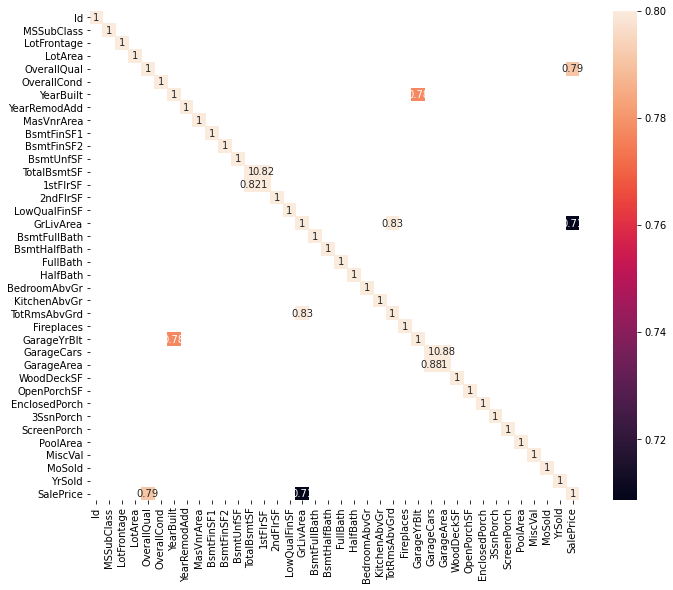

In [91]:
#STRONG POSITIVELY CORRELATED
corr_mat = data.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corr_mat[corr_mat > 0.7], vmax=.8, annot = True, square=True);


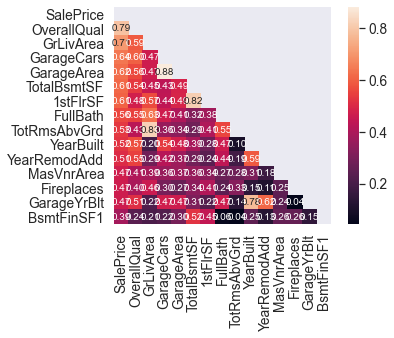

In [93]:
#saleprice correlation matrix
k = 15 #number of variables for heatmap
cols = corr_mat.nlargest(k, 'SalePrice')['SalePrice'].index
cm = np.corrcoef(data[cols].values.T)
sns.set(font_scale=1.25)
mask = np.zeros_like(cm)
mask[np.triu_indices_from(mask)] = True
hm = sns.heatmap(cm, cbar=True, mask = mask, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

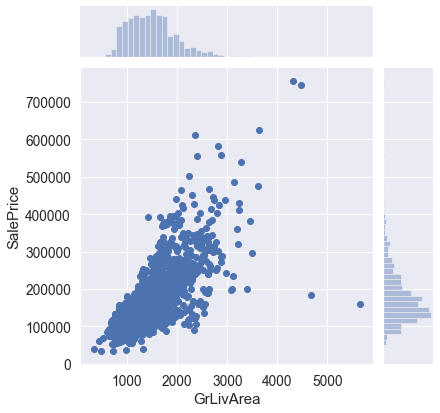

In [95]:
sns.jointplot(x='GrLivArea',y='SalePrice',data=data)

In [96]:
from sklearn.preprocessing import LabelEncoder

In [103]:
label_encoder = LabelEncoder()
data['MSZoning'] = label_encoder.fit_transform(data['MSZoning'])
data['Street'] = label_encoder.fit_transform(data['Street'])
data['LotShape'] = label_encoder.fit_transform(data['LotShape'])
data['LandContour'] = label_encoder.fit_transform(data['LandContour'])
data['Utilities'] = label_encoder.fit_transform(data['Utilities'])
data['LotConfig'] = label_encoder.fit_transform(data['LotConfig'])
data['LandSlope'] = label_encoder.fit_transform(data['LandSlope'])
data['Neighborhood'] = label_encoder.fit_transform(data['Neighborhood'])
data['Condition1'] = label_encoder.fit_transform(data['Condition1'])
data['Condition2'] = label_encoder.fit_transform(data['Condition2'])
data['BldgType'] = label_encoder.fit_transform(data['BldgType'])
data['HouseStyle'] = label_encoder.fit_transform(data['HouseStyle'])
data['RoofStyle'] = label_encoder.fit_transform(data['RoofStyle'])
data['RoofMatl'] = label_encoder.fit_transform(data['RoofMatl'])
data['Exterior1st'] = label_encoder.fit_transform(data['Exterior1st'])
data['MasVnrType'] = label_encoder.fit_transform(data['MasVnrType'])
data['ExterQual'] = label_encoder.fit_transform(data['ExterQual'])
data['ExterCond'] = label_encoder.fit_transform(data['ExterCond'])
data['Foundation'] = label_encoder.fit_transform(data['Foundation'])
data['BsmtQual'] = label_encoder.fit_transform(data['BsmtQual'])
data['BsmtCond'] = label_encoder.fit_transform(data['BsmtCond'])
data['BsmtExposure'] = label_encoder.fit_transform(data['BsmtExposure'])
data['BsmtFinType1'] = label_encoder.fit_transform(data['BsmtFinType1'])
data['BsmtFinType2'] = label_encoder.fit_transform(data['BsmtFinType2'])
data['Heating'] = label_encoder.fit_transform(data['Heating'])
data['HeatingQC'] = label_encoder.fit_transform(data['HeatingQC'])
data['CentralAir'] = label_encoder.fit_transform(data['CentralAir'])
data['Electrical'] = label_encoder.fit_transform(data['Electrical'])
data['KitchenQual'] = label_encoder.fit_transform(data['BsmtQual'])
data['Functional'] = label_encoder.fit_transform(data['Functional'])
data['FireplaceQu'] = label_encoder.fit_transform(data['FireplaceQu'])
data['GarageType'] = label_encoder.fit_transform(data['GarageType'])
data['GarageFinish'] = label_encoder.fit_transform(data['GarageFinish'])
data['GarageQual'] = label_encoder.fit_transform(data['GarageQual'])
data['GarageCond'] = label_encoder.fit_transform(data['GarageCond'])
data['PavedDrive'] = label_encoder.fit_transform(data['PavedDrive'])
data['SaleType'] = label_encoder.fit_transform(data['SaleType'])
data['SaleCondition'] = label_encoder.fit_transform(data['SaleCondition'])


In [117]:
data['Exterior2nd'] = label_encoder.fit_transform(data['Exterior2nd'])


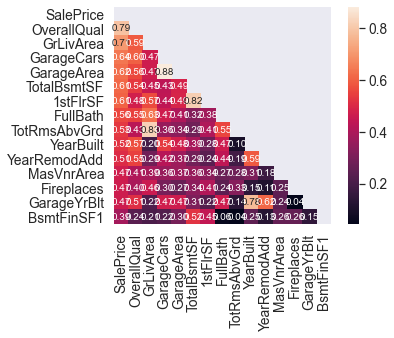

In [119]:
#saleprice correlation matrix
k = 15 #number of variables for heatmap
cols = corr_mat.nlargest(k, 'SalePrice')['SalePrice'].index
cm = np.corrcoef(data[cols].values.T)
sns.set(font_scale=1.25)
mask = np.zeros_like(cm)
mask[np.triu_indices_from(mask)] = True
hm = sns.heatmap(cm, cbar=True, mask = mask, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

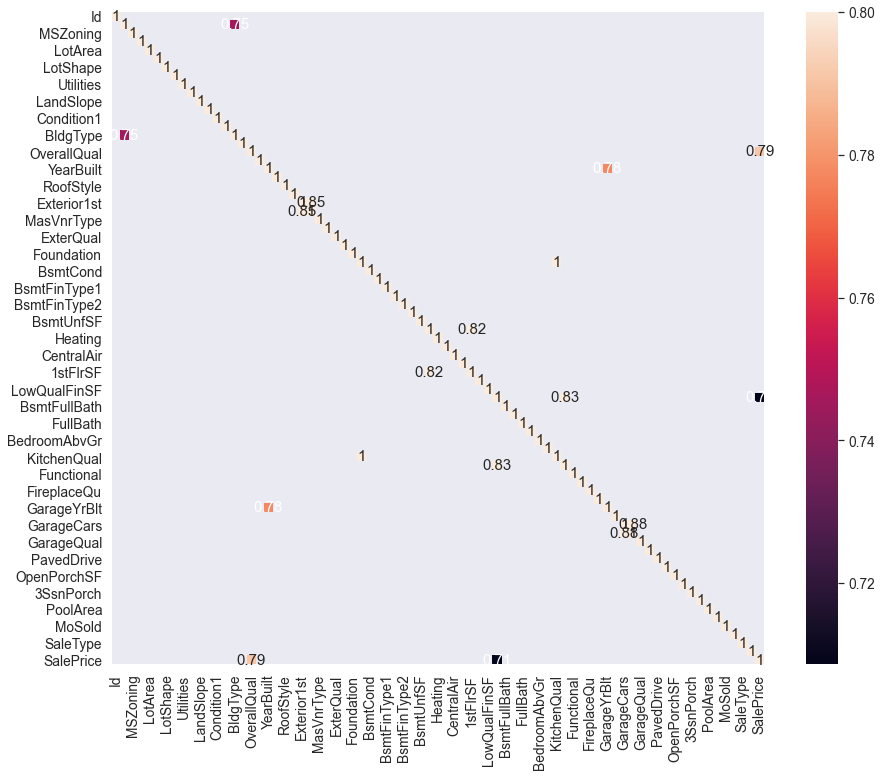

In [122]:
corr_mat = data.corr()
f, ax = plt.subplots(figsize=(15, 12))
sns.heatmap(corr_mat[corr_mat > 0.7], vmax=.8, annot = True, square=True);


In [98]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [105]:
X_train, X_test, y_train, y_test = train_test_split(data.drop('SalePrice', axis=1), data['SalePrice'], test_size=0.30 )

In [106]:
lr = LinearRegression()

In [107]:
lr.fit(X_train, y_train)

LinearRegression()

In [109]:
predictions=lr.predict(X_test)

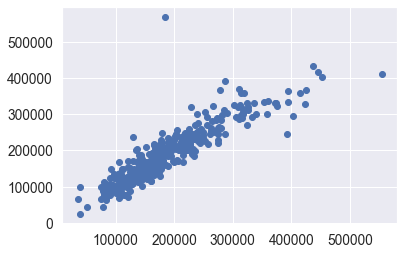

In [110]:
plt.scatter(y_test,predictions)

In [111]:
from sklearn import metrics

In [112]:
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

MAE: 21177.247190876868
MSE: 1137223383.4303598
RMSE: 33722.74282187557


In [113]:
cols = ['OverallQual', 'GrLivArea', 'GarageCars', 'GarageArea', 'TotalBsmtSF', '1stFlrSF', 'FullBath', 'TotRmsAbvGrd', 'YearBuilt']

In [114]:
X_train, X_test, y_train, y_test = train_test_split(data[cols], data['SalePrice'], test_size=0.30 )

In [115]:
lr.fit(X_train, y_train)
predictions=lr.predict(X_test)

In [116]:
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

MAE: 25735.460144819262
MSE: 2122102097.8087301
RMSE: 46066.279400541236
